In [74]:
import pandas as pd
import numpy as np 
import utils as utils
import pipeline as pipeline
import os
import json
from tqdm import tqdm
from datetime import datetime

# Test

In [77]:
json_files = sorted([f for f in os.listdir("results") if f.endswith(".json")])
data_per_time = {}
for file_name in tqdm(json_files):
    time = pd.Timestamp(datetime.fromtimestamp(int(file_name.split('_')[1].split('.')[0])/1000))
    with open('results/'+file_name) as f:
        data_per_time[time] = json.load(f)

100%|██████████| 19/19 [00:00<00:00, 1796.36it/s]


In [105]:
res = []
for k, v in data_per_time.items():
    for elt in v:
        res.append(elt['baseToken']['name'])
res = pd.Series(res).value_counts().sort_values(ascending = False)
res.head()

MOANEY              72
FATBEAR             46
King Of The Hill    38
WILLY               19
Copper Inu          19
Name: count, dtype: int64

In [121]:
time_keys = list(data_per_time.keys())

def retrieve_data(name):
    res = {}
    for k, v in data_per_time.items():
        for elt in v:
            if elt['baseToken']['name'] == name:
                res[k] = elt
    return res

test = retrieve_data('Copper Inu')

In [122]:
def create_df(dico, metric):
    res = { k : v[metric] for k, v in dico.items() }
    return pd.Series(res)

In [123]:
serie = create_df(test, 'marketCap')

<Axes: >

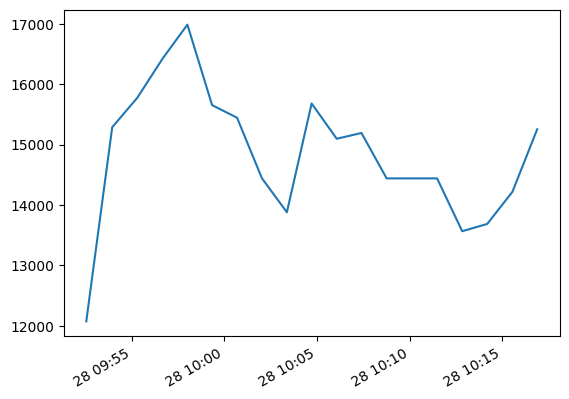

In [127]:
serie.plot()